In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from pylab import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

from sklearn.metrics import accuracy_score

#XGB_feature importance
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from tsaug import AddNoise, Convolve, Crop, Drift, Pool, Quantize, Resize, Reverse, TimeWarp
import tsaug

from numpy.random import seed
seed(7)

from sklearn.model_selection import train_test_split

SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2

rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Break"]

In [2]:
df = pd.read_csv('aps_failure_training_set.csv')
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [3]:
df['class'] = df['class'].replace({'pos': 1, 'neg': 0})
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,0,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,0,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,0,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
df=df.fillna(0)
df = df.replace('na', 0)

df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,0,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,0,2286,0,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,0,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,0,80292,0,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [5]:
df=df.head(10000)

In [6]:
df['class'].value_counts()


0    9805
1     195
Name: class, dtype: int64

In [7]:
X = df.drop(['class'], axis=1)
y = df['class']

X
X=X.fillna(0)
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,0,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,0,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38616,0,86,80,0,0,0,0,0,0,...,229696,109874,271022,406542,410586,202806,71378,8,0,0
9996,98566,0,2130706432,600,0,0,0,0,0,0,...,900504,446488,813106,702392,603666,429126,480776,7388,0,0
9997,14,0,8,8,0,0,0,0,0,0,...,320,98,0,0,0,0,0,0,0,0
9998,29886,0,0,0,0,0,0,0,0,0,...,256030,154530,488046,377016,83946,26954,13238,346,0,0


In [8]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: class, Length: 10000, dtype: int64

In [9]:
s = X.astype(str)


In [10]:
type(s)

pandas.core.frame.DataFrame

In [9]:
xgb = XGBRegressor(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

non_numeric_cols = X_train.select_dtypes(exclude='number').columns

X_train[non_numeric_cols] = X_train[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

xgb.fit(X_train._get_numeric_data(), y_train)

xgb.feature_importances_

importance_scores = xgb.feature_importances_
feature_names = X.columns

# Create a list of tuples with feature names and importances
features_importances = list(zip(feature_names, importance_scores))

# Sort the list in descending order based on importances
sorted_features = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Get the top 58 features
top_58_features = sorted_features[:58]

# Print the top 58 features
for feature, importance in top_58_features:
    print(f"{feature}, Importance: {importance}")



bj_000, Importance: 0.30572447180747986
ay_003, Importance: 0.08820606023073196
aq_000, Importance: 0.06476753950119019
ee_005, Importance: 0.05182725191116333
ag_002, Importance: 0.04686123877763748
cm_000, Importance: 0.02529015578329563
ec_00, Importance: 0.02014113776385784
am_0, Importance: 0.018467284739017487
ag_006, Importance: 0.01709854230284691
ay_000, Importance: 0.01665438339114189
az_007, Importance: 0.014885582961142063
ca_000, Importance: 0.014520099386572838
bd_000, Importance: 0.013883505016565323
cl_000, Importance: 0.013005126267671585
dx_000, Importance: 0.01178833656013012
cs_002, Importance: 0.011693298816680908
cn_006, Importance: 0.011397254653275013
ay_004, Importance: 0.011032450012862682
ag_005, Importance: 0.010879585519433022
ba_009, Importance: 0.009932738728821278
dn_000, Importance: 0.009471540339291096
ay_009, Importance: 0.008921018801629543
bk_000, Importance: 0.008667797781527042
ay_007, Importance: 0.008659528568387032
ay_008, Importance: 0.0084352

In [10]:
df1=df[['bj_000','ci_000','ay_002','ag_001', 'ay_005', 'ag_002','am_0', "ay_006",   "ee_003",   "ay_001",   "cl_000",   "cd_000",   "ee_007",   "ba_004",   "ay_008",   "by_000",   "al_000",   "cn_007",   
"ay_009",   "az_003",   "ay_003",   "dg_000",   "ay_000",   "dc_000",   "az_002",   "dx_000",   "cs_004",   "eb_000",   "cs_009",   "ee_008",   "ag_006",   "cn_002",  "cs_005",   "br_000",   "cj_000",   "bi_000",   "do_000",   "di_000",   "an_000",   "du_000",   "ao_000",   "cm_000",   "cs_006",   "ee_001",   "ba_002",   "ca_000",   "be_000",   "ck_000",   
"cs_002",   "aq_000",   "bf_000",   "at_000",   "ee_005",   "bb_000",   "bl_000",   "ee_000",   "bo_000",   "bk_000"]] 

df1

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002,aq_000,bf_000,at_000,ee_005,bb_000,bl_000,ee_000,bo_000,bk_000
0,799478,5245752,0,0,469014,0,0,4239660,493384,0,...,267998,1132040,50,0,469792,6700214,353400,965866,283680,330760
1,392208,2291079.36,0,0,71510,0,0,772720,178064,0,...,164860,338544,350,0,245416,3646660,359780,664504,0,341420
2,139730,2322692.16,0,0,0,0,0,870456,159812,0,...,56362,153698,4,0,409564,2673338,130640,262032,0,137160
3,3090,2135.04,0,0,0,0,3894,0,46,0,...,24,1014,0,0,44,21614,0,5670,0,0
4,399410,3565684.8,0,0,372236,0,0,2128914,229790,0,...,80950,551022,2,0,347188,4289260,282560,404740,0,306780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,164818,2088140.16,0,0,10234,0,0,1323288,109874,0,...,81226,220324,20,0,406542,2985780,476220,317628,0,174200
9996,685244,5779477.44,0,0,45048,0,0,2171000,446488,0,...,70638,886164,18,0,702392,7016548,252800,990070,222300,212780
9997,2228,2324.16,0,0,0,0,0,0,98,0,...,16,136,0,0,0,24492,0,5472,0,0
9998,184812,1850627.52,0,0,0,0,0,28770,154530,0,...,72322,140772,824,0,377016,2660020,219020,503110,0,221080


In [11]:
import re
window_size = 1000
for col in df1.columns:
    if col != 'time':
        df1['mean_window'] = df1[col].rolling(window_size, min_periods=1).mean()
        df1['mean_previous'] = df1[col].rolling(window_size, min_periods=1).mean().shift(1)
        df1['mean_subsequent'] = df1[col].rolling(window_size, min_periods=1).mean().shift(-1)
        df1['combined_df'] = (df1['mean_previous'] + df1['mean_subsequent']) / 2
        df1['mean_window_rev'] = df1[col][::-1].rolling(window_size, min_periods=1).mean()[::-1]
        
        # Updated condition to check for null or 0 values after trimming
        df1[col] = np.where((df1[col].isnull()) | (df1[col].apply(lambda x: re.sub(r'^0+|0+$', '', str(x))) == ''),
                            df1['combined_df'].combine_first(df1['mean_window_rev']),
                            df1[col])
        
        df1.loc[(df1[col].isnull() | (df1[col].apply(lambda x: re.sub(r'^0+|0+$', '', str(x))) == '')) & (df1.index == len(df) - 1), col] = df1['mean_previous']
        
df2 = df1.drop(['mean_previous', 'mean_subsequent', 'combined_df', 'mean_window_rev', 'mean_window'], axis=1)
df2

/var/folders/05/ntvwwb8x6tdf167m58_ryr800000gn/T/ipykernel_9328/1734753405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_window'] = df1[col].rolling(window_size, min_periods=1).mean()
/var/folders/05/ntvwwb8x6tdf167m58_ryr800000gn/T/ipykernel_9328/1734753405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_previous'] = df1[col].rolling(window_size, min_periods=1).mean().shift(1)
/var/folders/05/ntvwwb8x6tdf167m58_ryr800000gn/T/ipykernel_9328/1734753405.py:7: SettingWithCopyWarni

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002,aq_000,bf_000,at_000,ee_005,bb_000,bl_000,ee_000,bo_000,bk_000
0,799478,5245752,2198.356,828.488,469014,8571.65,107278.622,4239660,493384,3798.284,...,267998,1132040,50,6709.982,469792,6700214,353400,965866,283680,330760
1,392208,2291079.36,0.0,0.0,71510,0.0,0.0,772720,178064,0.0,...,164860,338544,350,0.0,245416,3646660,359780,664504,189120.0,341420
2,139730,2322692.16,0.0,0.0,202696.5,0.0,486.75,870456,159812,0.0,...,56362,153698,4,0.0,409564,2673338,130640,262032,106380.0,137160
3,3090,2135.04,0.0,0.0,181363.333333,0.0,3894,1781647.666667,46,0.0,...,24,1014,107.933333,0.0,44,21614,253274.666667,5670,75648.0,246502.0
4,399410,3565684.8,0.0,0.0,372236,0.0,811.25,2128914,229790,0.0,...,80950,551022,2,0.0,347188,4289260,282560,404740,59100.0,306780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,164818,2088140.16,1764.468,3327.952,10234,13638.176,140526.852,1323288,109874,1313.43,...,81226,220324,20,7743.794,406542,2985780,476220,317628,126800.79,174200
9996,685244,5779477.44,1764.468,3327.952,45048,13638.176,140526.852,2171000,446488,1313.43,...,70638,886164,18,7743.794,702392,7016548,252800,990070,222300,212780
9997,2228,2324.16,1764.468,3327.952,75771.196,13638.176,140526.852,969136.321,98,1313.43,...,16,136,63.614,7743.794,385324.37,24492,190547.58,5472,126911.94,180926.61
9998,184812,1850627.52,1764.468,3294.812,75744.202,12628.902,136991.084,28770,154530,1313.43,...,72322,140772,824,7735.537,377016,2660020,219020,503110,126742.42,221080


In [14]:
s_df1 = df1.astype(str)

In [12]:
df1

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,bb_000,bl_000,ee_000,bo_000,bk_000,mean_window,mean_previous,mean_subsequent,combined_df,mean_window_rev
0,799478,5245752,2198.356,828.488,469014,8571.65,107278.622,4239660,493384,3798.284,...,6700214,353400,965866,283680,330760,330760.00,NaN,336090.000000,NaN,170939.580000
1,392208,2291079.36,0.0,0.0,71510,0.0,0.0,772720,178064,0.0,...,3646660,359780,664504,189120.0,341420,336090.00,330760.00,269780.000000,300270.000000,171056.660000
2,139730,2322692.16,0.0,0.0,202696.5,0.0,486.75,870456,159812,0.0,...,2673338,130640,262032,106380.0,137160,269780.00,336090.00,202335.000000,269212.500000,171098.260000
3,3090,2135.04,0.0,0.0,181363.333333,0.0,3894,1781647.666667,46,0.0,...,21614,253274.666667,5670,75648.0,246502.0,202335.00,269780.00,223224.000000,246502.000000,171101.920000
4,399410,3565684.8,0.0,0.0,372236,0.0,811.25,2128914,229790,0.0,...,4289260,282560,404740,59100.0,306780,223224.00,202335.00,217103.333333,209719.166667,171101.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,164818,2088140.16,1764.468,3327.952,10234,13638.176,140526.852,1323288,109874,1313.43,...,2985780,476220,317628,126800.79,174200,180921.04,180925.66,181041.260000,180983.460000,121612.000000
9996,685244,5779477.44,1764.468,3327.952,45048,13638.176,140526.852,2171000,446488,1313.43,...,7016548,252800,990070,222300,212780,181041.26,180921.04,180820.960000,180871.000000,108465.000000
9997,2228,2324.16,1764.468,3327.952,75771.196,13638.176,140526.852,969136.321,98,1313.43,...,24492,190547.58,5472,126911.94,180926.61,180820.96,181041.26,180811.960000,180926.610000,73693.333333
9998,184812,1850627.52,1764.468,3294.812,75744.202,12628.902,136991.084,28770,154530,1313.43,...,2660020,219020,503110,126742.42,221080,180811.96,180820.96,180481.400000,180651.180000,110540.000000


In [13]:
df1 = df1.round()
df1

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,bb_000,bl_000,ee_000,bo_000,bk_000,mean_window,mean_previous,mean_subsequent,combined_df,mean_window_rev
0,799478,5245752,2198.356,828.488,469014,8571.65,107278.622,4239660,493384,3798.284,...,6700214,353400,965866,283680,330760,330760.0,NaN,336090.0,NaN,170940.0
1,392208,2291079.36,0.0,0.0,71510,0.0,0.0,772720,178064,0.0,...,3646660,359780,664504,189120.0,341420,336090.0,330760.0,269780.0,300270.0,171057.0
2,139730,2322692.16,0.0,0.0,202696.5,0.0,486.75,870456,159812,0.0,...,2673338,130640,262032,106380.0,137160,269780.0,336090.0,202335.0,269212.0,171098.0
3,3090,2135.04,0.0,0.0,181363.333333,0.0,3894,1781647.666667,46,0.0,...,21614,253274.666667,5670,75648.0,246502.0,202335.0,269780.0,223224.0,246502.0,171102.0
4,399410,3565684.8,0.0,0.0,372236,0.0,811.25,2128914,229790,0.0,...,4289260,282560,404740,59100.0,306780,223224.0,202335.0,217103.0,209719.0,171102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,164818,2088140.16,1764.468,3327.952,10234,13638.176,140526.852,1323288,109874,1313.43,...,2985780,476220,317628,126800.79,174200,180921.0,180926.0,181041.0,180983.0,121612.0
9996,685244,5779477.44,1764.468,3327.952,45048,13638.176,140526.852,2171000,446488,1313.43,...,7016548,252800,990070,222300,212780,181041.0,180921.0,180821.0,180871.0,108465.0
9997,2228,2324.16,1764.468,3327.952,75771.196,13638.176,140526.852,969136.321,98,1313.43,...,24492,190547.58,5472,126911.94,180926.61,180821.0,181041.0,180812.0,180927.0,73693.0
9998,184812,1850627.52,1764.468,3294.812,75744.202,12628.902,136991.084,28770,154530,1313.43,...,2660020,219020,503110,126742.42,221080,180812.0,180821.0,180481.0,180651.0,110540.0


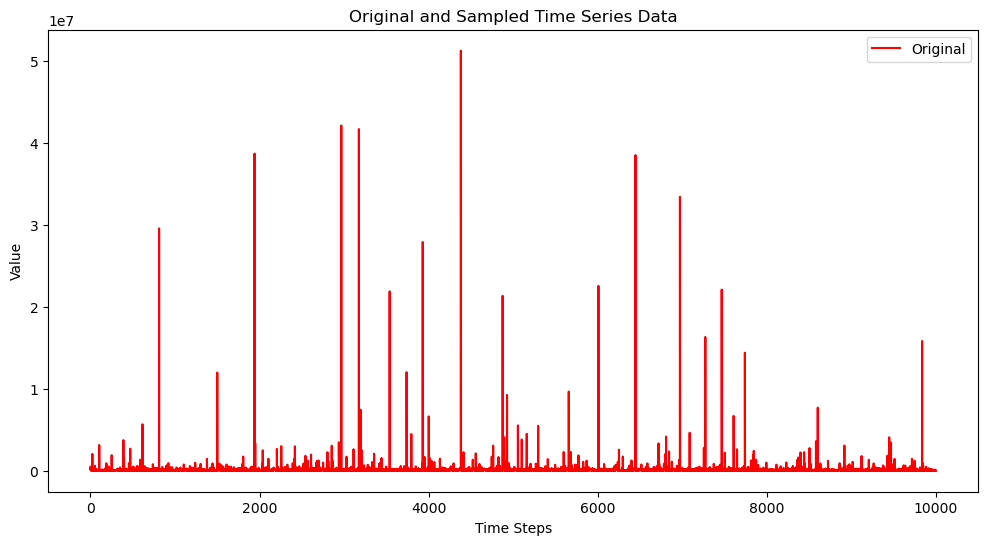

In [14]:
# Create subplots for original and sampled time series data in the same plot
plt.figure(figsize=(12, 6))

df1['ay_005'] = df1['ay_005'].astype(int)
#s_df1['ay_005'] = s_df1['ay_005'].astype(int)

# Original Time Series (in blue)
plt.plot(df1.ay_005, label='Original',  color='red' )

# Sampled Time Series (in red)
#plt.plot(s_df1.ci_000, label='Imputed series', color='blue')

plt.title('Original and Sampled Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()  # Add a legend to differentiate between the original and sampled series

plt.show()


In [18]:
df2 = df2.round()
df2
df2 = df2.astype(str)

In [ ]:
# Create subplots for original and sampled time series data in the same plot
plt.figure(figsize=(12, 6))

df2['ay_005'] = df2['ay_005'].astype(int)
#s_df1['ay_005'] = s_df1['ay_005'].astype(int)

# Original Time Series (in blue)
#plt.plot(df2.ay_005, label='Original',  color='red' )

# Sampled Time Series (in red)
plt.plot(df2.ci_000, label='Imputed series', color='blue')

plt.title('Original and Sampled Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()  # Add a legend to differentiate between the original and sampled series

plt.show()


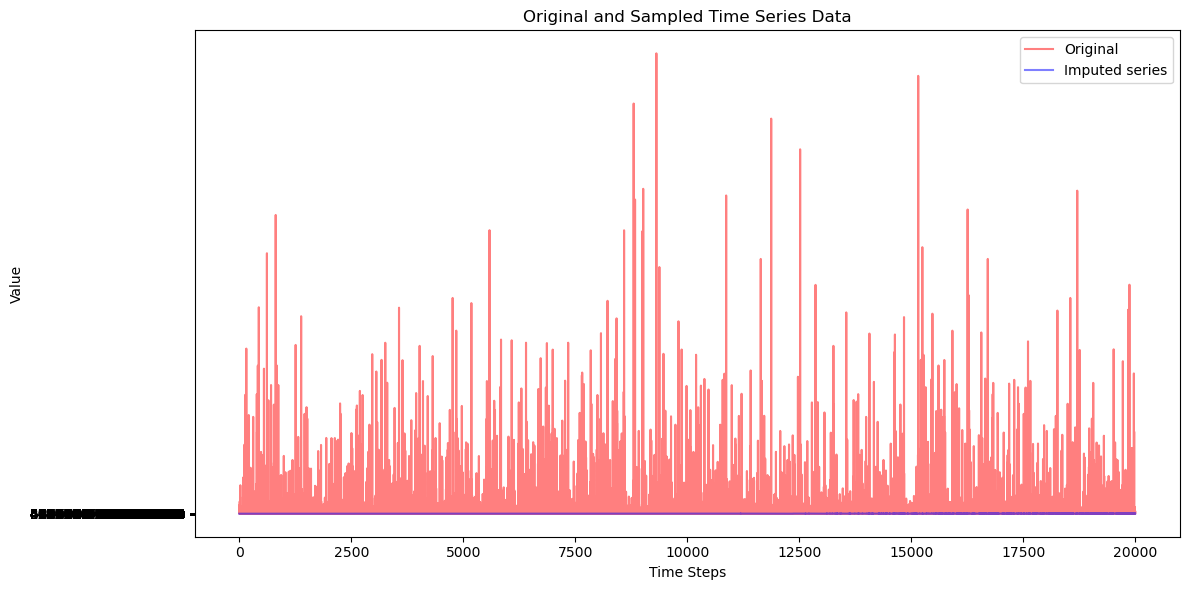

In [82]:
# Create subplots for original and sampled time series data in the same plot
plt.figure(figsize=(12, 6))

# Original Time Series (in blue)
plt.plot(df1.bj_000, alpha=0.5, linestyle='-', label='Original', color='red')

# Sampled Time Series (in red)
plt.plot(s_df1.bj_000, alpha=0.5, linestyle='-', label='Imputed series', color='blue')

plt.title('Original and Sampled Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()  # Add a legend to differentiate between the original and sampled series

plt.tight_layout()
plt.show()


In [ ]:
#W/O AUGMENTATION
df1.to_csv("APS_selected_without_null.csv")

In [69]:
#W AUGMENTATION
df1 = pd.read_csv('APS_selected_without_null.csv')
df1

,Unnamed: 0,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,...,cs_002,aq_000,bf_000,at_000,ee_005,bb_000,bl_000,ee_000,bo_000,bk_000
0,0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,...,267998.0,1132040.0,50.000000,6709.982,469792.0,6700214.0,353400.000000,965866.0,283680.00,330760.00
1,1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,...,164860.0,338544.0,350.000000,0.000,245416.0,3646660.0,359780.000000,664504.0,189120.00,341420.00
2,2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,...,56362.0,153698.0,4.000000,0.000,409564.0,2673338.0,130640.000000,262032.0,106380.00,137160.00
3,3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,...,24.0,1014.0,107.933333,0.000,44.0,21614.0,253274.666667,5670.0,75648.00,246502.00
4,4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,...,80950.0,551022.0,2.000000,0.000,347188.0,4289260.0,282560.000000,404740.0,59100.00,306780.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,...,138036.0,776370.0,14.000000,1574.588,1218244.0,10845228.0,221620.000000,1608808.0,152420.00,263320.00
59996,59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,...,3606.0,11622.0,66.645000,1574.588,68424.0,147638.0,163342.460000,13934.0,99662.58,160036.47
59997,59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,...,72.0,874.0,66.671000,1603.238,144.0,43738.0,163508.610000,15876.0,99843.76,160040.61
59998,59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,...,333922.0,1214970.0,70.000000,57300.000,225724.0,6159728.0,332300.000000,1180714.0,362360.00,302700.00


In [70]:
df1=df1.drop(['Unnamed: 0'], axis=1)
df1

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002,aq_000,bf_000,at_000,ee_005,bb_000,bl_000,ee_000,bo_000,bk_000
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,267998.0,1132040.0,50.000000,6709.982,469792.0,6700214.0,353400.000000,965866.0,283680.00,330760.00
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,164860.0,338544.0,350.000000,0.000,245416.0,3646660.0,359780.000000,664504.0,189120.00,341420.00
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,56362.0,153698.0,4.000000,0.000,409564.0,2673338.0,130640.000000,262032.0,106380.00,137160.00
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,24.0,1014.0,107.933333,0.000,44.0,21614.0,253274.666667,5670.0,75648.00,246502.00
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,80950.0,551022.0,2.000000,0.000,347188.0,4289260.0,282560.000000,404740.0,59100.00,306780.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,138036.0,776370.0,14.000000,1574.588,1218244.0,10845228.0,221620.000000,1608808.0,152420.00,263320.00
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,3606.0,11622.0,66.645000,1574.588,68424.0,147638.0,163342.460000,13934.0,99662.58,160036.47
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,72.0,874.0,66.671000,1603.238,144.0,43738.0,163508.610000,15876.0,99843.76,160040.61
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,333922.0,1214970.0,70.000000,57300.000,225724.0,6159728.0,332300.000000,1180714.0,362360.00,302700.00


In [77]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((48000, 58), (12000, 58))

In [78]:
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [ ]:
# define model
model = XGBClassifier()
# define evaluation procedure
#use repeated cross-validation to evaluate the model, with three repeats of 10-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, df1, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

In [79]:
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)

In [80]:
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))

0.9938333333333333


In [81]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     11816
     class 1       0.89      0.68      0.77       184

    accuracy                           0.99     12000
   macro avg       0.94      0.84      0.88     12000
weighted avg       0.99      0.99      0.99     12000



array([[11801,    15],
       [   59,   125]])

In [75]:
# define model
#scale_pos_weight=total_negative_examples / total_positive_examples
#total number of examples in the majority class / total number of examples in the minority class.
#59000/1000=59
model = XGBClassifier(scale_pos_weight=59)

clf_0 = model.fit(X_train, y_train)

In [76]:
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))

0.9934166666666666


In [77]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     11816
     class 1       0.79      0.77      0.78       184

    accuracy                           0.99     12000
   macro avg       0.89      0.88      0.89     12000
weighted avg       0.99      0.99      0.99     12000



array([[11779,    37],
       [   42,   142]])

In [78]:
model = XGBClassifier(scale_pos_weight=10)
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9945833333333334
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     11816
     class 1       0.87      0.76      0.81       184

    accuracy                           0.99     12000
   macro avg       0.94      0.88      0.90     12000
weighted avg       0.99      0.99      0.99     12000



array([[11796,    20],
       [   45,   139]])

In [83]:
#W AUGMENTATION
df2 = pd.read_csv('APS_augmented.csv')
df2

,Unnamed: 0,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,...,cs_002_pool,aq_000_pool,bf_000_pool,at_000_pool,ee_005_pool,bb_000_pool,bl_000_pool,ee_000_pool,bo_000_pool,bk_000_pool
0,0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,...,216429.0,735292.0,200.000000,3354.991,357604.0,5173437.0,356590.000000,815185.0,236400.000000,336090.00
1,1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,...,216429.0,735292.0,200.000000,3354.991,357604.0,5173437.0,356590.000000,815185.0,236400.000000,336090.00
2,2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,...,28193.0,77356.0,55.966667,0.000,204804.0,1347476.0,191957.333333,133851.0,91014.000000,191831.00
3,3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,...,28193.0,77356.0,55.966667,0.000,204804.0,1347476.0,191957.333333,133851.0,91014.000000,191831.00
4,4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,...,77089.0,449038.0,3.000000,0.000,323800.0,3521036.0,252680.000000,352909.0,53865.428571,246640.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,...,69022.0,388532.0,40.330000,1574.588,609205.0,5451215.0,192753.500000,807553.0,126330.860000,211734.65
59996,59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,...,1839.0,6248.0,66.658000,1588.913,34284.0,95688.0,163425.535000,14905.0,99753.170000,160038.54
59997,59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,...,1839.0,6248.0,66.658000,1588.913,34284.0,95688.0,163425.535000,14905.0,99753.170000,160038.54
59998,59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,...,207575.0,774917.0,36.000000,28650.000,239896.0,4618067.0,300290.000000,795256.0,181180.000000,247010.00


In [85]:
df2=df2.drop(['Unnamed: 0'], axis=1)
df2

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_pool,aq_000_pool,bf_000_pool,at_000_pool,ee_005_pool,bb_000_pool,bl_000_pool,ee_000_pool,bo_000_pool,bk_000_pool
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,216429.0,735292.0,200.000000,3354.991,357604.0,5173437.0,356590.000000,815185.0,236400.000000,336090.00
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,216429.0,735292.0,200.000000,3354.991,357604.0,5173437.0,356590.000000,815185.0,236400.000000,336090.00
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,28193.0,77356.0,55.966667,0.000,204804.0,1347476.0,191957.333333,133851.0,91014.000000,191831.00
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,28193.0,77356.0,55.966667,0.000,204804.0,1347476.0,191957.333333,133851.0,91014.000000,191831.00
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,77089.0,449038.0,3.000000,0.000,323800.0,3521036.0,252680.000000,352909.0,53865.428571,246640.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,69022.0,388532.0,40.330000,1574.588,609205.0,5451215.0,192753.500000,807553.0,126330.860000,211734.65
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,1839.0,6248.0,66.658000,1588.913,34284.0,95688.0,163425.535000,14905.0,99753.170000,160038.54
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,1839.0,6248.0,66.658000,1588.913,34284.0,95688.0,163425.535000,14905.0,99753.170000,160038.54
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,207575.0,774917.0,36.000000,28650.000,239896.0,4618067.0,300290.000000,795256.0,181180.000000,247010.00


In [90]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((48000, 580), (12000, 580))

In [92]:
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# define model
model = XGBClassifier()

In [94]:
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.99375
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.90      0.66      0.76       184

    accuracy                           0.99     12000
   macro avg       0.95      0.83      0.88     12000
weighted avg       0.99      0.99      0.99     12000



array([[11803,    13],
       [   62,   122]])

In [95]:
model = XGBClassifier(scale_pos_weight=59)
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9921666666666666
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     11816
     class 1       0.76      0.72      0.74       184

    accuracy                           0.99     12000
   macro avg       0.88      0.86      0.87     12000
weighted avg       0.99      0.99      0.99     12000



array([[11773,    43],
       [   51,   133]])

In [101]:
model = XGBClassifier(scale_pos_weight=10)
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9931666666666666
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     11816
     class 1       0.83      0.70      0.76       184

    accuracy                           0.99     12000
   macro avg       0.91      0.85      0.88     12000
weighted avg       0.99      0.99      0.99     12000



array([[11789,    27],
       [   55,   129]])

In [ ]:
# define grid
weights = [1, 10, 25, 50, 75, 99, 100,700,800,1000]
param_grid = dict(scale_pos_weight=weights)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(df2, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [59]:
#W AUGMENTATION stage 1
df3 = pd.read_csv('APS_augmented_stage1.csv')
df3

,Unnamed: 0,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,...,cs_002_expanding_window,aq_000_expanding_window,bf_000_expanding_window,at_000_expanding_window,ee_005_expanding_window,bb_000_expanding_window,bl_000_expanding_window,ee_000_expanding_window,bo_000_expanding_window,bk_000_expanding_window
0,0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,...,216429.000000,735292.000000,200.000000,3354.991000,357604.000000,5.173437e+06,356590.000000,815185.000000,236400.000000,336090.000000
2,2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,...,163073.333333,541427.333333,134.666667,2236.660667,374924.000000,4.340071e+06,281273.333333,630800.666667,193060.000000,269780.000000
3,3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,...,122311.000000,406324.000000,127.983333,1677.495500,281204.000000,3.260456e+06,274273.666667,474518.000000,163707.000000,263960.500000
4,4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,...,114038.800000,435263.600000,102.786667,1341.996400,294400.800000,3.466217e+06,275930.933333,460562.400000,142785.600000,272524.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,...,243395.597698,444036.331479,105.041843,9552.294642,412203.343674,4.533945e+06,257932.867515,746481.130175,210080.179798,240518.741691
59996,59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,...,243391.601005,444029.124213,105.041203,9552.161673,412197.613732,4.533872e+06,257931.290929,746468.920446,210078.339412,240517.400253
59997,59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,...,243387.545543,444021.738048,105.040564,9552.029187,412190.745943,4.533797e+06,257929.717166,746456.743491,210076.502108,240516.058929
59998,59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,...,243389.054476,444034.587400,105.039980,9552.824999,412187.638112,4.533824e+06,257930.956691,746463.981233,210079.040209,240517.095345


In [60]:
df3=df3.drop(['Unnamed: 0'], axis=1)
df3
df3.replace([np.inf, -np.inf], np.nan, inplace=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((48000, 290), (12000, 290))

In [41]:
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [61]:
# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9935
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.89      0.66      0.76       184

    accuracy                           0.99     12000
   macro avg       0.94      0.83      0.88     12000
weighted avg       0.99      0.99      0.99     12000



array([[11801,    15],
       [   63,   121]])

In [64]:
df_new=df3

In [65]:
#Convolve
df_new['bj_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.bj_000.to_numpy())
df_new['ci_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ci_000.to_numpy())
df_new['ay_002_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_002.to_numpy())
df_new['ag_001_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ag_001.to_numpy())
df_new['ay_005_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_005.to_numpy())
df_new['ag_002_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ag_002.to_numpy())
df_new['am_0_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.am_0.to_numpy())
df_new['ay_006_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_006.to_numpy())
df_new['ee_003_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ee_003.to_numpy())
df_new['ay_001_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_001.to_numpy())
df_new['cl_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cl_000.to_numpy())
df_new['cd_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cd_000.to_numpy())
df_new['ee_007_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ee_007.to_numpy())  
df_new['ba_004_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ba_004.to_numpy())
df_new['ay_008_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_008.to_numpy())
df_new['by_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.by_000.to_numpy()) 
df_new['al_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.al_000.to_numpy()) 
df_new['cn_007_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cn_007.to_numpy())  
df_new['ay_009_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_009.to_numpy()) 
df_new['az_003_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.az_003.to_numpy()) 
df_new['ay_003_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_003.to_numpy()) 
df_new['dg_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.dg_000.to_numpy())  
df_new['ay_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ay_000.to_numpy())
df_new['dc_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.dc_000.to_numpy())  
df_new['az_002_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.az_002.to_numpy())  
df_new['dx_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.dx_000.to_numpy()) 
df_new['cs_004_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cs_004.to_numpy()) 
df_new['eb_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.eb_000.to_numpy())
df_new['cs_009_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cs_009.to_numpy()) 
df_new['ee_008_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ee_008.to_numpy())
df_new['ag_006_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ag_006.to_numpy())  
df_new['cn_002_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cn_002.to_numpy())
df_new['cs_005_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cs_005.to_numpy()) 
df_new['br_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.br_000.to_numpy())
df_new['cj_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cj_000.to_numpy()) 
df_new['bi_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.bi_000.to_numpy())
df_new['do_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.do_000.to_numpy())
df_new['di_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.di_000.to_numpy())
df_new['an_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.an_000.to_numpy()) 
df_new['du_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.du_000.to_numpy())
df_new['ao_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ao_000.to_numpy()) 
df_new['cm_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cm_000.to_numpy())
df_new['cs_006_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cs_006.to_numpy())
df_new['ee_001_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ee_001.to_numpy())
df_new['ba_002_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ba_002.to_numpy())
df_new['ca_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ca_000.to_numpy())
df_new['be_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.be_000.to_numpy())
df_new['ck_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ck_000.to_numpy())
df_new['cs_002_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.cs_002.to_numpy()) 
df_new['aq_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.aq_000.to_numpy())
df_new['bf_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.bf_000.to_numpy())
df_new['at_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.at_000.to_numpy())
df_new['ee_005_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ee_005.to_numpy())
df_new['bb_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.bb_000.to_numpy())
df_new['bl_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.bl_000.to_numpy())
df_new['ee_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.ee_000.to_numpy())
df_new['bo_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.bo_000.to_numpy())
df_new['bk_000_cnv'] = tsaug.Convolve(window="flat", size=10).augment(df_new.bk_000.to_numpy())
df_new

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_cnv,aq_000_cnv,bf_000_cnv,at_000_cnv,ee_005_cnv,bb_000_cnv,bl_000_cnv,ee_000_cnv,bo_000_cnv,bk_000_cnv
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,218191.690079,765542.801633,166.708431,3669.052666,391034.599862,5.352510e+06,339970.558084,819116.195912,238745.471902,320693.029669
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,110631.171692,266568.195226,167.957529,442.808243,303897.441757,3.032037e+06,250896.601230,451532.988470,153190.117901,243137.745604
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,35001.781352,94185.513808,82.553772,-312.605196,209634.297143,1.594955e+06,209519.772190,172083.626499,90625.635734,212425.207891
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,39768.994870,266289.977386,33.975349,-71.234128,201902.825290,2.195378e+06,248062.162267,199505.154203,61078.910885,253578.145846
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,60515.603060,363263.102056,5.606273,-1.456470,221856.960002,2.673221e+06,254413.695663,258957.840280,44248.487829,246870.458781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,50027.213720,288357.426819,43.805765,-422.204705,547657.120250,4.641231e+06,182024.485604,676490.803726,114694.497099,200456.397731
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,46003.363405,188956.104551,64.630207,7342.691894,162254.923837,1.675809e+06,181677.592411,278685.825931,136529.586568,183675.222781
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,145762.571126,523053.627723,65.752304,25680.753851,77667.248385,2.519173e+06,241591.975582,489930.585975,205320.287406,220311.862426
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,179241.091693,670924.659767,33.216923,23476.415530,215972.710804,4.083888e+06,289140.063704,690542.558383,151929.179856,234337.499732


In [66]:
df_new=df_new.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9934166666666666
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.90      0.64      0.75       184

    accuracy                           0.99     12000
   macro avg       0.95      0.82      0.87     12000
weighted avg       0.99      0.99      0.99     12000



array([[11803,    13],
       [   66,   118]])

In [54]:
df_new=df3
df_new

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_expanding_window,aq_000_expanding_window,bf_000_expanding_window,at_000_expanding_window,ee_005_expanding_window,bb_000_expanding_window,bl_000_expanding_window,ee_000_expanding_window,bo_000_expanding_window,bk_000_expanding_window
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,216429.000000,735292.000000,200.000000,3354.991000,357604.000000,5.173437e+06,356590.000000,815185.000000,236400.000000,336090.000000
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,163073.333333,541427.333333,134.666667,2236.660667,374924.000000,4.340071e+06,281273.333333,630800.666667,193060.000000,269780.000000
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,122311.000000,406324.000000,127.983333,1677.495500,281204.000000,3.260456e+06,274273.666667,474518.000000,163707.000000,263960.500000
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,114038.800000,435263.600000,102.786667,1341.996400,294400.800000,3.466217e+06,275930.933333,460562.400000,142785.600000,272524.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,243395.597698,444036.331479,105.041843,9552.294642,412203.343674,4.533945e+06,257932.867515,746481.130175,210080.179798,240518.741691
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,243391.601005,444029.124213,105.041203,9552.161673,412197.613732,4.533872e+06,257931.290929,746468.920446,210078.339412,240517.400253
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,243387.545543,444021.738048,105.040564,9552.029187,412190.745943,4.533797e+06,257929.717166,746456.743491,210076.502108,240516.058929
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,243389.054476,444034.587400,105.039980,9552.824999,412187.638112,4.533824e+06,257930.956691,746463.981233,210079.040209,240517.095345


In [67]:
df_new['bj_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.bj_000.to_numpy())
df_new['ci_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ci_000.to_numpy())
df_new['ay_002_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_002.to_numpy())
df_new['ag_001_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ag_001.to_numpy())
df_new['ay_005_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_005.to_numpy())
df_new['ag_002_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ag_002.to_numpy())
df_new['am_0_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.am_0.to_numpy())
df_new['ay_006_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_006.to_numpy())
df_new['ee_003_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ee_003.to_numpy())
df_new['ay_001_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_001.to_numpy())
df_new['cl_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cl_000.to_numpy())
df_new['cd_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cd_000.to_numpy())
df_new['ee_007_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ee_007.to_numpy())  
df_new['ba_004_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ba_004.to_numpy())
df_new['ay_008_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_008.to_numpy())
df_new['by_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.by_000.to_numpy()) 
df_new['al_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.al_000.to_numpy()) 
df_new['cn_007_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cn_007.to_numpy())  
df_new['ay_009_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_009.to_numpy()) 
df_new['az_003_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.az_003.to_numpy()) 
df_new['ay_003_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_003.to_numpy()) 
df_new['dg_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.dg_000.to_numpy())  
df_new['ay_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ay_000.to_numpy())
df_new['dc_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.dc_000.to_numpy())  
df_new['az_002_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.az_002.to_numpy())  
df_new['dx_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.dx_000.to_numpy()) 
df_new['cs_004_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cs_004.to_numpy()) 
df_new['eb_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.eb_000.to_numpy())
df_new['cs_009_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cs_009.to_numpy()) 
df_new['ee_008_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ee_008.to_numpy())
df_new['ag_006_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ag_006.to_numpy())  
df_new['cn_002_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cn_002.to_numpy())
df_new['cs_005_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cs_005.to_numpy()) 
df_new['br_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.br_000.to_numpy())
df_new['cj_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cj_000.to_numpy()) 
df_new['bi_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.bi_000.to_numpy())
df_new['do_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.do_000.to_numpy())
df_new['di_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.di_000.to_numpy())
df_new['an_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.an_000.to_numpy()) 
df_new['du_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.du_000.to_numpy())
df_new['ao_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ao_000.to_numpy()) 
df_new['cm_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cm_000.to_numpy())
df_new['cs_006_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cs_006.to_numpy())
df_new['ee_001_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ee_001.to_numpy())
df_new['ba_002_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ba_002.to_numpy())
df_new['ca_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ca_000.to_numpy())
df_new['be_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.be_000.to_numpy())
df_new['ck_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ck_000.to_numpy())
df_new['cs_002_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.cs_002.to_numpy()) 
df_new['aq_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.aq_000.to_numpy())
df_new['bf_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.bf_000.to_numpy())
df_new['at_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.at_000.to_numpy())
df_new['ee_005_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ee_005.to_numpy())
df_new['bb_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.bb_000.to_numpy())
df_new['bl_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.bl_000.to_numpy())
df_new['ee_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.ee_000.to_numpy())
df_new['bo_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.bo_000.to_numpy())
df_new['bk_000_tw'] = tsaug.TimeWarp(n_speed_change=2, max_speed_ratio=5).augment(df_new.bk_000.to_numpy())

df_new

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_tw,aq_000_tw,bf_000_tw,at_000_tw,ee_005_tw,bb_000_tw,bl_000_tw,ee_000_tw,bo_000_tw,bk_000_tw
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,267998.000000,1.132040e+06,50.000000,6.709982e+03,4.697920e+05,6.700214e+06,353400.000000,965866.000000,283680.000000,330760.000000
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,174268.633407,2.084526e+05,299.008699,6.709770e+03,2.471326e+05,2.659694e+06,229731.076100,650332.798576,91476.233352,330760.250680
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,76154.442795,2.251680e+05,34.632508,6.709134e+03,3.100832e+05,4.273478e+06,213937.409999,243974.285557,48946.124667,330761.002704
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,15437.816026,3.084740e+05,61.102779,6.708073e+03,1.044675e+06,1.188260e+05,228465.349122,47845.241409,226617.825609,330762.256048
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,51432.785570,4.637399e+05,3.178808,6.706588e+03,1.206842e+05,7.539565e+06,223887.671217,390129.169737,102594.837515,330764.010688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,81312.169613,3.171270e+05,13.425429,2.582536e+01,2.347885e+05,3.022290e+05,163382.944677,410045.743018,301326.453296,186714.401224
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,81275.345999,3.299097e+05,66.668822,1.452695e+01,2.396095e+05,4.244437e+04,163497.434077,409937.357197,225982.603280,160186.866955
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,81249.042928,6.827544e+05,63.534851,6.456502e+00,2.444298e+05,6.110475e+06,268465.833474,409859.937301,150646.910867,237969.703729
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,81233.260797,1.522688e+03,66.658771,1.614146e+00,2.492493e+05,1.397151e+06,312395.910853,409813.484519,75319.376342,177546.503689


In [68]:
df_new=df_new.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9934166666666666
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.88      0.66      0.75       184

    accuracy                           0.99     12000
   macro avg       0.94      0.83      0.88     12000
weighted avg       0.99      0.99      0.99     12000



array([[11800,    16],
       [   63,   121]])

In [34]:
df_new['bj_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.bj_000.to_numpy())
df_new['ci_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ci_000.to_numpy())
df_new['ay_002_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_002.to_numpy())
df_new['ag_001_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ag_001.to_numpy())
df_new['ay_005_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_005.to_numpy())
df_new['ag_002_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ag_002.to_numpy())
df_new['am_0_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.am_0.to_numpy())
df_new['ay_006_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_006.to_numpy())
df_new['ee_003_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ee_003.to_numpy())
df_new['ay_001_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_001.to_numpy())
df_new['cl_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cl_000.to_numpy())
df_new['cd_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cd_000.to_numpy())
df_new['ee_007_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ee_007.to_numpy())  
df_new['ba_004_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ba_004.to_numpy())
df_new['ay_008_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_008.to_numpy())
df_new['by_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.by_000.to_numpy()) 
df_new['al_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.al_000.to_numpy()) 
df_new['cn_007_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cn_007.to_numpy())  
df_new['ay_009_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_009.to_numpy()) 
df_new['az_003_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.az_003.to_numpy()) 
df_new['ay_003_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_003.to_numpy()) 
df_new['dg_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.dg_000.to_numpy())  
df_new['ay_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ay_000.to_numpy())
df_new['dc_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.dc_000.to_numpy())  
df_new['az_002_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.az_002.to_numpy())  
df_new['dx_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.dx_000.to_numpy()) 
df_new['cs_004_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cs_004.to_numpy()) 
df_new['eb_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.eb_000.to_numpy())
df_new['cs_009_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cs_009.to_numpy()) 
df_new['ee_008_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ee_008.to_numpy())
df_new['ag_006_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ag_006.to_numpy())  
df_new['cn_002_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cn_002.to_numpy())
df_new['cs_005_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cs_005.to_numpy()) 
df_new['br_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.br_000.to_numpy())
df_new['cj_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cj_000.to_numpy()) 
df_new['bi_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.bi_000.to_numpy())
df_new['do_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.do_000.to_numpy())
df_new['di_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.di_000.to_numpy())
df_new['an_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.an_000.to_numpy()) 
df_new['du_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.du_000.to_numpy())
df_new['ao_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ao_000.to_numpy()) 
df_new['cm_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cm_000.to_numpy())
df_new['cs_006_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cs_006.to_numpy())
df_new['ee_001_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ee_001.to_numpy())
df_new['ba_002_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ba_002.to_numpy())
df_new['ca_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ca_000.to_numpy())
df_new['be_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.be_000.to_numpy())
df_new['ck_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ck_000.to_numpy())
df_new['cs_002_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.cs_002.to_numpy()) 
df_new['aq_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.aq_000.to_numpy())
df_new['bf_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.bf_000.to_numpy())
df_new['at_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.at_000.to_numpy())
df_new['ee_005_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ee_005.to_numpy())
df_new['bb_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.bb_000.to_numpy())
df_new['bl_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.bl_000.to_numpy())
df_new['ee_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.ee_000.to_numpy())
df_new['bo_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.bo_000.to_numpy())
df_new['bk_000_drift'] = tsaug.Drift(max_drift=0.3, n_drift_points=5).augment(df_new.bk_000.to_numpy())

df_new





,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_drift,aq_000_drift,bf_000_drift,at_000_drift,ee_005_drift,bb_000_drift,bl_000_drift,ee_000_drift,bo_000_drift,bk_000_drift
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,2.679980e+05,1.132040e+06,50.000000,6709.982000,4.697920e+05,6.700214e+06,353400.000000,9.658660e+05,283680.000000,330760.000000
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,1.642662e+05,3.361857e+05,349.098380,-252.636390,2.433183e+05,3.639051e+06,359764.941219,6.621444e+05,189153.471027,341409.177962
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,5.517464e+04,1.489819e+05,2.196996,-505.212995,4.053691e+05,2.658121e+06,130609.889614,2.573131e+05,106446.938679,137138.356538
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,-1.756804e+03,-6.059499e+03,105.229179,-757.729819,-6.247832e+03,-1.208560e+03,253229.511851,-1.407855e+03,75748.402955,246469.535726
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,7.857591e+04,5.415915e+05,-1.605069,-1010.186867,3.387997e+05,4.258833e+06,282499.807930,3.953035e+05,59233.863857,306736.715528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,1.395695e+07,-1.308752e+06,13759.438568,181964.030289,1.844329e+07,-1.007567e+07,487343.779482,-1.649258e+07,249868.442034,62812.323100
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,1.382424e+07,-2.073918e+06,13811.152587,182179.107555,1.729485e+07,-2.076255e+07,429062.941262,-1.808555e+07,197121.849024,-40453.615566
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,1.382242e+07,-2.085083e+06,13810.247307,182422.905070,1.722795e+07,-2.085574e+07,429225.794795,-1.808171e+07,197313.860883,-40431.885201
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,1.415799e+07,-8.714051e+05,13812.644727,238334.884841,1.745491e+07,-1.472905e+07,598013.890079,-1.691497e+07,459840.937612,102245.094194


In [35]:
df_new=df_new.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9935
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.89      0.66      0.76       184

    accuracy                           0.99     12000
   macro avg       0.94      0.83      0.88     12000
weighted avg       0.99      0.99      0.99     12000



array([[11801,    15],
       [   63,   121]])

In [43]:
df3

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_trend,aq_000_trend,bf_000_trend,at_000_trend,ee_005_trend,bb_000_trend,bl_000_trend,ee_000_trend,bo_000_trend,bk_000_trend
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,163520.0,490706.5,188.500000,1677.4955,342547.0,4166718.0,300900.000000,639226.5,192075.000000,287690.0000
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,69402.0,161738.5,116.483333,0.0000,266147.0,2253737.5,218583.666667,298559.5,119382.000000,215560.5000
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,34340.0,176687.0,55.466667,0.0000,189210.0,1751456.5,229937.333333,169528.0,79194.000000,234236.0000
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,58788.0,362528.0,28.983333,0.0000,248708.0,2838236.5,260298.666667,279057.0,60619.714286,261640.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,69921.5,391264.0,40.326250,1574.5880,626269.5,5473824.0,192617.365000,809462.0,126186.075000,211706.4425
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,36330.0,200122.0,53.490250,1581.7505,338809.0,2796060.5,177953.382500,413138.0,112897.230000,185858.3875
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,84418.0,307085.0,67.496750,15520.2660,73609.0,1598710.5,205664.920000,306600.0,165427.525000,195704.4225
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,187286.0,691419.5,52.167750,29050.8095,176415.0,3859900.0,274097.152500,696775.5,206140.940000,239190.1525


In [44]:
df_new=df3

In [45]:
df_new

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_trend,aq_000_trend,bf_000_trend,at_000_trend,ee_005_trend,bb_000_trend,bl_000_trend,ee_000_trend,bo_000_trend,bk_000_trend
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,163520.0,490706.5,188.500000,1677.4955,342547.0,4166718.0,300900.000000,639226.5,192075.000000,287690.0000
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,69402.0,161738.5,116.483333,0.0000,266147.0,2253737.5,218583.666667,298559.5,119382.000000,215560.5000
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,34340.0,176687.0,55.466667,0.0000,189210.0,1751456.5,229937.333333,169528.0,79194.000000,234236.0000
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,58788.0,362528.0,28.983333,0.0000,248708.0,2838236.5,260298.666667,279057.0,60619.714286,261640.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,69921.5,391264.0,40.326250,1574.5880,626269.5,5473824.0,192617.365000,809462.0,126186.075000,211706.4425
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,36330.0,200122.0,53.490250,1581.7505,338809.0,2796060.5,177953.382500,413138.0,112897.230000,185858.3875
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,84418.0,307085.0,67.496750,15520.2660,73609.0,1598710.5,205664.920000,306600.0,165427.525000,195704.4225
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,187286.0,691419.5,52.167750,29050.8095,176415.0,3859900.0,274097.152500,696775.5,206140.940000,239190.1525


In [28]:
#STD-trend
from statsmodels.tsa.seasonal import seasonal_decompose
df_new['bj_000_trend'] = seasonal_decompose(x=df_new['bj_000'], model='additive', period=2).seasonal
df_new['ci_000_trend'] = seasonal_decompose(x=df_new['ci_000'], model='additive', period=2).seasonal
df_new['ay_002_trend'] = seasonal_decompose(x=df_new['ay_002'], model='additive', period=2).seasonal
df_new['ag_001_trend'] = seasonal_decompose(x=df_new['ag_001'], model='additive', period=2).seasonal
df_new['ay_005_trend'] = seasonal_decompose(x=df_new['ay_005'], model='additive', period=2).seasonal
df_new['ag_002_trend'] = seasonal_decompose(x=df_new['ag_002'], model='additive', period=2).seasonal
df_new['am_0_trend'] = seasonal_decompose(x=df_new['am_0'], model='additive', period=2).seasonal
df_new['ay_006_trend'] = seasonal_decompose(x=df_new['ay_006'], model='additive', period=2).seasonal
df_new['ee_003_trend'] = seasonal_decompose(x=df_new['ee_003'], model='additive', period=2).seasonal
df_new['ay_001_trend'] = seasonal_decompose(x=df_new['ay_001'], model='additive', period=2).seasonal
df_new['cl_000_trend'] = seasonal_decompose(x=df_new['cl_000'], model='additive', period=2).seasonal
df_new['cd_000_trend'] = seasonal_decompose(x=df_new['cd_000'], model='additive', period=2).seasonal
df_new['ee_007_trend'] = seasonal_decompose(x=df_new['ee_007'], model='additive', period=2).seasonal  
df_new['ba_004_trend'] = seasonal_decompose(x=df_new['ba_004'], model='additive', period=2).seasonal
df_new['ay_008_trend'] = seasonal_decompose(x=df_new['ay_008'], model='additive', period=2).seasonal
df_new['by_000_trend'] = seasonal_decompose(x=df_new['by_000'], model='additive', period=2).seasonal 
df_new['al_000_trend'] = seasonal_decompose(x=df_new['al_000'], model='additive', period=2).seasonal 
df_new['cn_007_trend'] = seasonal_decompose(x=df_new['cn_007'], model='additive', period=2).seasonal  
df_new['ay_009_trend'] = seasonal_decompose(x=df_new['ay_009'], model='additive', period=2).seasonal 
df_new['az_003_trend'] = seasonal_decompose(x=df_new['az_003'], model='additive', period=2).seasonal 
df_new['ay_003_trend'] = seasonal_decompose(x=df_new['ay_003'], model='additive', period=2).seasonal 
df_new['dg_000_trend'] = seasonal_decompose(x=df_new['dg_000'], model='additive', period=2).seasonal  
df_new['ay_000_trend'] = seasonal_decompose(x=df_new['ay_000'], model='additive', period=2).seasonal
df_new['dc_000_trend'] = seasonal_decompose(x=df_new['dc_000'], model='additive', period=2).seasonal  
df_new['az_002_trend'] = seasonal_decompose(x=df_new['az_002'], model='additive', period=2).seasonal  
df_new['dx_000_trend'] = seasonal_decompose(x=df_new['dx_000'], model='additive', period=2).seasonal 
df_new['cs_004_trend'] = seasonal_decompose(x=df_new['cs_004'], model='additive', period=2).seasonal 
df_new['eb_000_trend'] = seasonal_decompose(x=df_new['eb_000'], model='additive', period=2).seasonal
df_new['cs_009_trend'] = seasonal_decompose(x=df_new['cs_009'], model='additive', period=2).seasonal 
df_new['ee_008_trend'] = seasonal_decompose(x=df_new['ee_008'], model='additive', period=2).seasonal
df_new['ag_006_trend'] = seasonal_decompose(x=df_new['ag_006'], model='additive', period=2).seasonal  
df_new['cn_002_trend'] = seasonal_decompose(x=df_new['cn_002'], model='additive', period=2).seasonal
df_new['cs_005_trend'] = seasonal_decompose(x=df_new['cs_005'], model='additive', period=2).seasonal 
df_new['br_000_trend'] = seasonal_decompose(x=df_new['br_000'], model='additive', period=2).seasonal
df_new['cj_000_trend'] = seasonal_decompose(x=df_new['cj_000'], model='additive', period=2).seasonal 
df_new['bi_000_trend'] = seasonal_decompose(x=df_new['bi_000'], model='additive', period=2).seasonal
df_new['do_000_trend'] = seasonal_decompose(x=df_new['do_000'], model='additive', period=2).seasonal
df_new['di_000_trend'] = seasonal_decompose(x=df_new['di_000'], model='additive', period=2).seasonal
df_new['an_000_trend'] = seasonal_decompose(x=df_new['an_000'], model='additive', period=2).seasonal 
df_new['du_000_trend'] = seasonal_decompose(x=df_new['du_000'], model='additive', period=2).seasonal
df_new['ao_000_trend'] = seasonal_decompose(x=df_new['ao_000'], model='additive', period=2).seasonal 
df_new['cm_000_trend'] = seasonal_decompose(x=df_new['cm_000'], model='additive', period=2).seasonal
df_new['cs_006_trend'] = seasonal_decompose(x=df_new['cs_006'], model='additive', period=2).seasonal
df_new['ee_001_trend'] = seasonal_decompose(x=df_new['ee_001'], model='additive', period=2).seasonal
df_new['ba_002_trend'] = seasonal_decompose(x=df_new['ba_002'], model='additive', period=2).seasonal
df_new['ca_000_trend'] = seasonal_decompose(x=df_new['ca_000'], model='additive', period=2).seasonal
df_new['be_000_trend'] = seasonal_decompose(x=df_new['be_000'], model='additive', period=2).seasonal
df_new['ck_000_trend'] = seasonal_decompose(x=df_new['ck_000'], model='additive', period=2).seasonal
df_new['cs_002_trend'] = seasonal_decompose(x=df_new['cs_002'], model='additive', period=2).seasonal 
df_new['aq_000_trend'] = seasonal_decompose(x=df_new['aq_000'], model='additive', period=2).seasonal
df_new['bf_000_trend'] = seasonal_decompose(x=df_new['bf_000'], model='additive', period=2).seasonal
df_new['at_000_trend'] = seasonal_decompose(x=df_new['at_000'], model='additive', period=2).seasonal
df_new['ee_005_trend'] = seasonal_decompose(x=df_new['ee_005'], model='additive', period=2).seasonal
df_new['bb_000_trend'] = seasonal_decompose(x=df_new['bb_000'], model='additive', period=2).seasonal
df_new['bl_000_trend'] = seasonal_decompose(x=df_new['bl_000'], model='additive', period=2).seasonal
df_new['ee_000_trend'] = seasonal_decompose(x=df_new['ee_000'], model='additive', period=2).seasonal
df_new['bo_000_trend'] = seasonal_decompose(x=df_new['bo_000'], model='additive', period=2).seasonal
df_new['bk_000_trend'] = seasonal_decompose(x=df_new['bk_000'], model='additive', period=2).seasonal



df_new




,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_trend,aq_000_trend,bf_000_trend,at_000_trend,ee_005_trend,bb_000_trend,bl_000_trend,ee_000_trend,bo_000_trend,bk_000_trend
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378


In [29]:
df_new=df_new.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.993
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.87      0.64      0.74       184

    accuracy                           0.99     12000
   macro avg       0.93      0.82      0.87     12000
weighted avg       0.99      0.99      0.99     12000



array([[11799,    17],
       [   67,   117]])

In [48]:
#pooling
df_new['bj_000_pool'] = tsaug.Pool(size=2).augment(df_new.bj_000.to_numpy())
df_new['ci_000_pool'] = tsaug.Pool(size=2).augment(df_new.ci_000.to_numpy())
df_new['ay_002_pool'] = tsaug.Pool(size=2).augment(df_new.ay_002.to_numpy())
df_new['ag_001_pool'] = tsaug.Pool(size=2).augment(df_new.ag_001.to_numpy())
df_new['ay_005_pool'] = tsaug.Pool(size=2).augment(df_new.ay_005.to_numpy())
df_new['ag_002_pool'] = tsaug.Pool(size=2).augment(df_new.ag_002.to_numpy())
df_new['am_0_pool'] = tsaug.Pool(size=2).augment(df_new.am_0.to_numpy())
df_new['ay_006_pool'] = tsaug.Pool(size=2).augment(df_new.ay_006.to_numpy())
df_new['ee_003_pool'] = tsaug.Pool(size=2).augment(df_new.ee_003.to_numpy())
df_new['ay_001_pool'] = tsaug.Pool(size=2).augment(df_new.ay_001.to_numpy())
df_new['cl_000_pool'] = tsaug.Pool(size=2).augment(df_new.cl_000.to_numpy())
df_new['cd_000_pool'] = tsaug.Pool(size=2).augment(df_new.cd_000.to_numpy())
df_new['ee_007_pool'] = tsaug.Pool(size=2).augment(df_new.ee_007.to_numpy())  
df_new['ba_004_pool'] = tsaug.Pool(size=2).augment(df_new.ba_004.to_numpy())
df_new['ay_008_pool'] = tsaug.Pool(size=2).augment(df_new.ay_008.to_numpy())
df_new['by_000_pool'] = tsaug.Pool(size=2).augment(df_new.by_000.to_numpy()) 
df_new['al_000_pool'] = tsaug.Pool(size=2).augment(df_new.al_000.to_numpy()) 
df_new['cn_007_pool'] = tsaug.Pool(size=2).augment(df_new.cn_007.to_numpy())  
df_new['ay_009_pool'] = tsaug.Pool(size=2).augment(df_new.ay_009.to_numpy()) 
df_new['az_003_pool'] = tsaug.Pool(size=2).augment(df_new.az_003.to_numpy()) 
df_new['ay_003_pool'] = tsaug.Pool(size=2).augment(df_new.ay_003.to_numpy()) 
df_new['dg_000_pool'] = tsaug.Pool(size=2).augment(df_new.dg_000.to_numpy())  
df_new['ay_000_pool'] = tsaug.Pool(size=2).augment(df_new.ay_000.to_numpy())
df_new['dc_000_pool'] = tsaug.Pool(size=2).augment(df_new.dc_000.to_numpy())  
df_new['az_002_pool'] = tsaug.Pool(size=2).augment(df_new.az_002.to_numpy())  
df_new['dx_000_pool'] = tsaug.Pool(size=2).augment(df_new.dx_000.to_numpy()) 
df_new['cs_004_pool'] = tsaug.Pool(size=2).augment(df_new.cs_004.to_numpy()) 
df_new['eb_000_pool'] = tsaug.Pool(size=2).augment(df_new.eb_000.to_numpy())
df_new['cs_009_pool'] = tsaug.Pool(size=2).augment(df_new.cs_009.to_numpy()) 
df_new['ee_008_pool'] = tsaug.Pool(size=2).augment(df_new.ee_008.to_numpy())
df_new['ag_006_pool'] = tsaug.Pool(size=2).augment(df_new.ag_006.to_numpy())  
df_new['cn_002_pool'] = tsaug.Pool(size=2).augment(df_new.cn_002.to_numpy())
df_new['cs_005_pool'] = tsaug.Pool(size=2).augment(df_new.cs_005.to_numpy()) 
df_new['br_000_pool'] = tsaug.Pool(size=2).augment(df_new.br_000.to_numpy())
df_new['cj_000_pool'] = tsaug.Pool(size=2).augment(df_new.cj_000.to_numpy()) 
df_new['bi_000_pool'] = tsaug.Pool(size=2).augment(df_new.bi_000.to_numpy())
df_new['do_000_pool'] = tsaug.Pool(size=2).augment(df_new.do_000.to_numpy())
df_new['di_000_pool'] = tsaug.Pool(size=2).augment(df_new.di_000.to_numpy())
df_new['an_000_pool'] = tsaug.Pool(size=2).augment(df_new.an_000.to_numpy()) 
df_new['du_000_pool'] = tsaug.Pool(size=2).augment(df_new.du_000.to_numpy())
df_new['ao_000_pool'] = tsaug.Pool(size=2).augment(df_new.ao_000.to_numpy()) 
df_new['cm_000_pool'] = tsaug.Pool(size=2).augment(df_new.cm_000.to_numpy())
df_new['cs_006_pool'] = tsaug.Pool(size=2).augment(df_new.cs_006.to_numpy())
df_new['ee_001_pool'] = tsaug.Pool(size=2).augment(df_new.ee_001.to_numpy())
df_new['ba_002_pool'] = tsaug.Pool(size=2).augment(df_new.ba_002.to_numpy())
df_new['ca_000_pool'] = tsaug.Pool(size=2).augment(df_new.ca_000.to_numpy())
df_new['be_000_pool'] = tsaug.Pool(size=2).augment(df_new.be_000.to_numpy())
df_new['ck_000_pool'] = tsaug.Pool(size=2).augment(df_new.ck_000.to_numpy())
df_new['cs_002_pool'] = tsaug.Pool(size=2).augment(df_new.cs_002.to_numpy()) 
df_new['aq_000_pool'] = tsaug.Pool(size=2).augment(df_new.aq_000.to_numpy())
df_new['bf_000_pool'] = tsaug.Pool(size=2).augment(df_new.bf_000.to_numpy())
df_new['at_000_pool'] = tsaug.Pool(size=2).augment(df_new.at_000.to_numpy())
df_new['ee_005_pool'] = tsaug.Pool(size=2).augment(df_new.ee_005.to_numpy())
df_new['bb_000_pool'] = tsaug.Pool(size=2).augment(df_new.bb_000.to_numpy())
df_new['bl_000_pool'] = tsaug.Pool(size=2).augment(df_new.bl_000.to_numpy())
df_new['ee_000_pool'] = tsaug.Pool(size=2).augment(df_new.ee_000.to_numpy())
df_new['bo_000_pool'] = tsaug.Pool(size=2).augment(df_new.bo_000.to_numpy())
df_new['bk_000_pool'] = tsaug.Pool(size=2).augment(df_new.bk_000.to_numpy())



df_new




,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_pool,aq_000_pool,bf_000_pool,at_000_pool,ee_005_pool,bb_000_pool,bl_000_pool,ee_000_pool,bo_000_pool,bk_000_pool
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,216429.0,735292.0,200.000000,3354.991,357604.0,5173437.0,356590.000000,815185.0,236400.000000,336090.00
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,216429.0,735292.0,200.000000,3354.991,357604.0,5173437.0,356590.000000,815185.0,236400.000000,336090.00
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,28193.0,77356.0,55.966667,0.000,204804.0,1347476.0,191957.333333,133851.0,91014.000000,191831.00
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,28193.0,77356.0,55.966667,0.000,204804.0,1347476.0,191957.333333,133851.0,91014.000000,191831.00
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,77089.0,449038.0,3.000000,0.000,323800.0,3521036.0,252680.000000,352909.0,53865.428571,246640.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,69022.0,388532.0,40.330000,1574.588,609205.0,5451215.0,192753.500000,807553.0,126330.860000,211734.65
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,1839.0,6248.0,66.658000,1588.913,34284.0,95688.0,163425.535000,14905.0,99753.170000,160038.54
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,1839.0,6248.0,66.658000,1588.913,34284.0,95688.0,163425.535000,14905.0,99753.170000,160038.54
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,207575.0,774917.0,36.000000,28650.000,239896.0,4618067.0,300290.000000,795256.0,181180.000000,247010.00


In [49]:
df_new=df_new.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.9933333333333333
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.90      0.64      0.75       184

    accuracy                           0.99     12000
   macro avg       0.95      0.82      0.87     12000
weighted avg       0.99      0.99      0.99     12000



array([[11803,    13],
       [   67,   117]])

In [62]:

#quantize
df_new['bj_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bj_000.to_numpy())
df_new['ci_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ci_000.to_numpy())
df_new['ay_002_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_002.to_numpy())
df_new['ag_001_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ag_001.to_numpy())
df_new['ay_005_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_005.to_numpy())
df_new['ag_002_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ag_002.to_numpy())
df_new['am_0_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.am_0.to_numpy())
df_new['ay_006_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_006.to_numpy())
df_new['ee_003_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ee_003.to_numpy())
df_new['ay_001_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_001.to_numpy())
df_new['cl_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cl_000.to_numpy())
df_new['cd_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cd_000.to_numpy())
df_new['ee_007_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ee_007.to_numpy())  
df_new['ba_004_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ba_004.to_numpy())
df_new['ay_008_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_008.to_numpy())
df_new['by_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.by_000.to_numpy()) 
df_new['al_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.al_000.to_numpy()) 
df_new['cn_007_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cn_007.to_numpy())  
df_new['ay_009_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_009.to_numpy()) 
df_new['az_003_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.az_003.to_numpy()) 
df_new['ay_003_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_003.to_numpy()) 
df_new['dg_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.dg_000.to_numpy())  
df_new['ay_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ay_000.to_numpy())
df_new['dc_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.dc_000.to_numpy())  
df_new['az_002_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.az_002.to_numpy())  
df_new['dx_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.dx_000.to_numpy()) 
df_new['cs_004_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cs_004.to_numpy()) 
df_new['eb_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.eb_000.to_numpy())
df_new['cs_009_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cs_009.to_numpy()) 
df_new['ee_008_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ee_008.to_numpy())
df_new['ag_006_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ag_006.to_numpy())  
df_new['cn_002_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cn_002.to_numpy())
df_new['cs_005_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cs_005.to_numpy()) 
df_new['br_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.br_000.to_numpy())
df_new['cj_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cj_000.to_numpy()) 
df_new['bi_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bi_000.to_numpy())
df_new['do_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.do_000.to_numpy())
df_new['di_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.di_000.to_numpy())
df_new['an_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.an_000.to_numpy()) 
df_new['du_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.du_000.to_numpy())
df_new['ao_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ao_000.to_numpy()) 
df_new['cm_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cm_000.to_numpy())
df_new['cs_006_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cs_006.to_numpy())
df_new['ee_001_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ee_001.to_numpy())
df_new['ba_002_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ba_002.to_numpy())
df_new['ca_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ca_000.to_numpy())
df_new['be_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.be_000.to_numpy())
df_new['ck_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ck_000.to_numpy())
df_new['cs_002_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.cs_002.to_numpy()) 
df_new['aq_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.aq_000.to_numpy())
df_new['bf_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bf_000.to_numpy())
df_new['at_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.at_000.to_numpy())
df_new['ee_005_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ee_005.to_numpy())
df_new['bb_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bb_000.to_numpy())
df_new['bl_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bl_000.to_numpy())
df_new['ee_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ee_000.to_numpy())
df_new['bo_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bo_000.to_numpy())
df_new['bk_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bk_000.to_numpy())



df_new





/var/folders/05/ntvwwb8x6tdf167m58_ryr800000gn/T/ipykernel_8023/1955588649.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['bj_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.bj_000.to_numpy())
/var/folders/05/ntvwwb8x6tdf167m58_ryr800000gn/T/ipykernel_8023/1955588649.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['ci_000_qnt'] = tsaug.Quantize(n_levels=20).augment(df_new.ci_000.to_numpy())
/var/folders/05/ntvwwb8x6tdf167m58_ryr800000gn/T/ipykernel_8023/1955588649.py:4: PerformanceWarning: DataFrame

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_qnt,aq_000_qnt,bf_000_qnt,at_000_qnt,ee_005_qnt,bb_000_qnt,bl_000_qnt,ee_000_qnt,bo_000_qnt,bk_000_qnt
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,1152150.45,1917200.3,1278.2,260012.6,1435882.85,14465368.75,379350.5,1874620.9,294907.5,368794.5
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,1152150.45,639068.1,1278.2,260012.6,1435882.85,4821792.25,379350.5,1874620.9,229372.5,368794.5
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,1152150.45,639068.1,1278.2,260012.6,1435882.85,4821792.25,186657.5,1874620.9,163837.5,173917.5
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,1152150.45,639068.1,1278.2,260012.6,1435882.85,4821792.25,315119.5,1874620.9,98302.5,303835.5
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,1152150.45,639068.1,1278.2,260012.6,1435882.85,4821792.25,315119.5,1874620.9,98302.5,368794.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,1152150.45,1917200.3,1278.2,260012.6,1435882.85,14465368.75,250888.5,1874620.9,163837.5,303835.5
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,1152150.45,639068.1,1278.2,260012.6,1435882.85,4821792.25,186657.5,1874620.9,163837.5,173917.5
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,1152150.45,639068.1,1278.2,260012.6,1435882.85,4821792.25,186657.5,1874620.9,163837.5,173917.5
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,1152150.45,1917200.3,1278.2,260012.6,1435882.85,14465368.75,379350.5,1874620.9,425977.5,303835.5


In [63]:
df_new=df_new.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.994
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.94      0.65      0.77       184

    accuracy                           0.99     12000
   macro avg       0.97      0.83      0.88     12000
weighted avg       0.99      0.99      0.99     12000



array([[11808,     8],
       [   64,   120]])

In [37]:
df_new=df_new.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
# define model
model = XGBClassifier(scale_pos_weight=120)
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.99175
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     11816
     class 1       0.73      0.73      0.73       184

    accuracy                           0.99     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.99      0.99      0.99     12000



array([[11766,    50],
       [   49,   135]])

# APS augmentation +sampling

In [10]:
#W AUGMENTATION stage 1
df = pd.read_csv('APS_augmented_best_augmented.csv')
df

,Unnamed: 0,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,...,cs_002_trend,aq_000_trend,bf_000_trend,at_000_trend,ee_005_trend,bb_000_trend,bl_000_trend,ee_000_trend,bo_000_trend,bk_000_trend
0,0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
1,1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
2,2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
3,3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
4,4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
59996,59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
59997,59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
59998,59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378


In [11]:
df=df.drop(['Unnamed: 0'], axis=1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df

,bj_000,ci_000,ay_002,ag_001,ay_005,ag_002,am_0,ay_006,ee_003,ay_001,...,cs_002_trend,aq_000_trend,bf_000_trend,at_000_trend,ee_005_trend,bb_000_trend,bl_000_trend,ee_000_trend,bo_000_trend,bk_000_trend
0,799478.0,5245752.00,2198.356,828.488,469014.000000,8571.650,107278.622,4.239660e+06,493384.0,3798.284,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
1,392208.0,2291079.36,0.000,0.000,71510.000000,0.000,0.000,7.727200e+05,178064.0,0.000,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
2,139730.0,2322692.16,0.000,0.000,202696.500000,0.000,486.750,8.704560e+05,159812.0,0.000,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
3,3090.0,2135.04,0.000,0.000,181363.333333,0.000,3894.000,1.781648e+06,46.0,0.000,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
4,399410.0,3565684.80,0.000,0.000,372236.000000,0.000,811.250,2.128914e+06,229790.0,0.000,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,678792.0,8289544.32,5757.992,1061.362,45114.000000,6691.674,2114.000,2.533260e+06,566884.0,13500.280,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
59996,9572.0,123344.64,5757.992,1061.362,4610.000000,6691.674,76769.085,9.912000e+04,6760.0,13500.280,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378
59997,6224.0,7518.72,5757.992,1061.362,137882.849000,6691.674,76768.344,1.062160e+06,386.0,13500.280,...,-56.581429,3057.309798,1.39349,736.004956,2949.371061,14658.05445,739.774844,-3559.368812,1397.791862,458.398378
59998,1032454.0,4776505.92,5757.992,1061.362,119742.000000,6691.558,76758.797,4.445146e+06,222654.0,13500.280,...,56.581429,-3057.309798,-1.39349,-736.004956,-2949.371061,-14658.05445,-739.774844,3559.368812,-1397.791862,-458.398378


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# define model
model = XGBClassifier()
clf_0 = model.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)
print(accuracy_score(pred_y_0, y_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)

0.99325
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.90      0.63      0.74       184

    accuracy                           0.99     12000
   macro avg       0.95      0.81      0.87     12000
weighted avg       0.99      0.99      0.99     12000



array([[11803,    13],
       [   68,   116]])

In [14]:
from imblearn.pipeline import Pipeline

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

X_train=X_train.fillna(0)
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='all'))
# Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])

model = XGBClassifier()

clf_0 = pipeline.fit(X_train, y_train)
pred_y_0 = clf_0.predict(X_test)

print(accuracy_score(pred_y_0, y_test))

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_0, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_0)


#scale_pos_weight=10

0.99025
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00     11816
     class 1       0.69      0.65      0.67       184

    accuracy                           0.99     12000
   macro avg       0.84      0.82      0.83     12000
weighted avg       0.99      0.99      0.99     12000



array([[11763,    53],
       [   64,   120]])

In [17]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
# define model
model = XGBClassifier(scale_pos_weight=10)

X_train=X_train.fillna(0)

#Define SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
#Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])

clf_2 = pipeline.fit(X_train, y_train)
pred_y_2 = clf_2.predict(X_test)

print(accuracy_score(pred_y_2, y_test))

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_2, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_2)

0.9840833333333333
              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99     11816
     class 1       0.49      0.84      0.62       184

    accuracy                           0.98     12000
   macro avg       0.74      0.91      0.80     12000
weighted avg       0.99      0.98      0.99     12000



array([[11655,   161],
       [   30,   154]])

In [18]:
#ADASYN

from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
model = XGBClassifier()

#Define ADASYN
resample=ADASYN(random_state=42)
clf_2 = pipeline.fit(X_train, y_train)
pred_y_2 = clf_2.predict(X_test)

print(accuracy_score(pred_y_2, y_test))

pred_y_train = clf_2.predict(X_train)
print(accuracy_score(pred_y_train, y_train))


target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y_2, target_names=target_names))

# View confusion matrix for test data and predictions
confusion_matrix(y_test, pred_y_2)

0.9834166666666667
0.9888541666666667
              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99     11816
     class 1       0.48      0.86      0.61       184

    accuracy                           0.98     12000
   macro avg       0.74      0.92      0.80     12000
weighted avg       0.99      0.98      0.99     12000



array([[11643,   173],
       [   26,   158]])